# Importing Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Importing Dataset

The dataset we are going to use in this article is the famous Iris data set. Some additional information about the Iris dataset is available at:

https://archive.ics.uci.edu/ml/datasets/iris

The dataset consists of 150 records of Iris plant with four features: 'sepal-length', 'sepal-width', 'petal-length', and 'petal-width'. All of the features are numeric. The records have been classified into one of the three classes i.e. 'Iris-setosa', 'Iris-versicolor', or 'Iris-verginica'.

Execute the following script to download the dataset using pandas:

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

# Let's take a look at what our dataset looks like:

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing
The first preprocessing step is to divide the dataset into a feature set and corresponding labels. The following script performs this task:

In [4]:
Features = dataset.drop('Class', 1)
Labels = dataset['Class']

C:\Users\kseon\AppData\Local\Temp/ipykernel_6896/1571883819.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Features = dataset.drop('Class', 1)


# Normalization of Features
As mentioned earlier, PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set. To do this, execute the following code:

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Features_norm = sc.fit_transform(Features)

# K-means Clustering:
The goal of the K-means clustering algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of the K groups based on the features that are provided.

The outputs of executing a K-means on a dataset are:

● K centroids: Centroids for each of the K clusters identified from the dataset.

● Labels for the training data: Complete dataset labelled to ensure each data point is assigned to one of the clusters.

Using K-means clustering on Iris dataset:

In [6]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier
y_kmeans = kmeans.fit_predict(Features_norm)

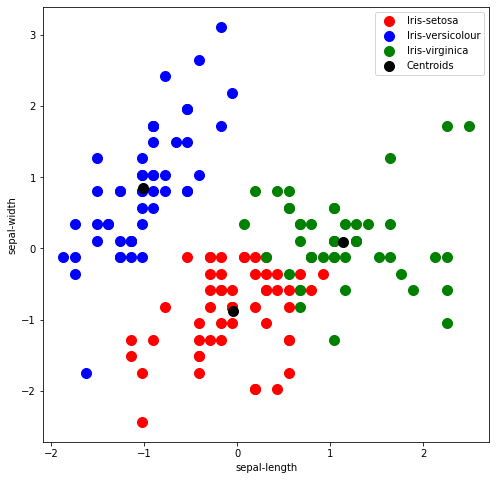

In [7]:
fig = plt.figure(figsize = (8,8))

#Visualising the clusters - On the first two columns
plt.scatter(Features_norm[y_kmeans   == 0, 0], Features_norm[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(Features_norm[y_kmeans   == 1, 0], Features_norm[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(Features_norm[y_kmeans   == 2, 0], Features_norm[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   

 #plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')  

plt.xlabel("sepal-length")
plt.ylabel("sepal-width")

plt.legend()
plt.show()

In [8]:
whos

Variable         Type              Data/Info
--------------------------------------------
Features         DataFrame              sepal-length  sepal-<...>n\n[150 rows x 4 columns]
Features_norm    ndarray           150x4: 600 elems, type `float64`, 4800 bytes
KMeans           type              <class 'sklearn.cluster._kmeans.KMeans'>
Labels           Series            0         Iris-setosa\n1 <...>ength: 150, dtype: object
StandardScaler   type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
dataset          DataFrame              sepal-length  sepal-<...>n\n[150 rows x 5 columns]
fig              Figure            Figure(576x576)
kmeans           KMeans            KMeans(max_iter=100, n_cl<...>usters=3, random_state=0)
load_iris        function          <function load_iris at 0x00000201C0DDB670>
names            list              n=5
np               module            <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd               module            <modu